## 归一化和标准化 

> 起因：在分析别人代码时候[[MEC-offloading]](https://github.com/ykdh/MEC-offloading/blob/main/environment.py#L88)看到作者把经过tanh激活函数∈\[-1,1\]范围的数据再转化为目标数据的范围，根据的是：$y=(ymax-ymin)*(x-xmin)/(xmax-xmin)+ymin $所以想稍微深入一点认识归一化。

归一化总的来说就是特征缩放
归一化：对数据的数值范围进行特定缩放，但不改变其数据分布的一种线性特征变换。
> 使用特征缩放的作用是：
- 使不同量纲的特征处于同一数值量级，减少方差大的特征的影响，使模型更准确。
- 加快学习算法的收敛速度。

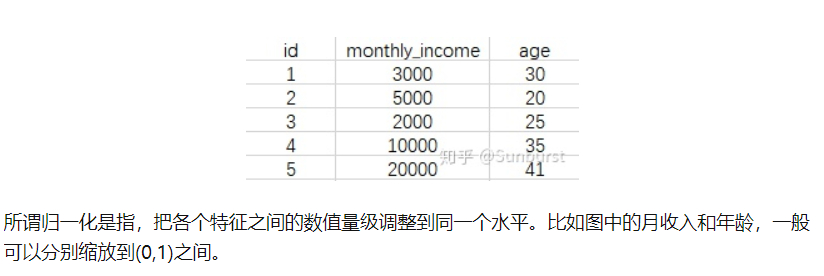

其实，归一化是一个让权重变为统一的过程。

比如，大学生自习室安排问题中，宿舍距各教室路线长短，教室大小，照明质量，满座率等都是影响结果的因素，这些因素本身有一个相对值，可以在本身内作为权重去衡量某项安排的优化程度，但这些因素之间没有一个统一的标准去衡量他，到底是路线长短重要，还是满座率重要，还是别的，它们在最终的决策中怎么进行权重的分配，这就需要归一化来处理，使每个大因素下的小变量之间有一个桥梁，合理的去参与到对决策的影响中。

作者：曾小开
链接：https://www.zhihu.com/question/19951858/answer/13519970
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

为什么要做数据归一化：
> 为了减少数据中存在的奇异样本存在所引起的网络时间增加，并可能导致网络无法收敛。

什么是奇异样本：
> 奇异样本，指相对于其他输入样本特别大或特别小的样本矢量。

> 如X1：(2.1，1.1)，X2：(2.3, 0.6)， X3：(1.8, 0.9)， X4：(1.9, 1.2)， X5：(21.3, 11)。这里X5就是奇异样本。

### 在哪里做归一化
> 列代表着一个特征，而行代表着一个记录的几个维度，单位不同，数据范畴不懂，这个时候强行做归一化就失去意义了，强行归一化甚至会产生掩盖特征的作用。

> 纵向归一化是因为纵向的特征具有可比较性，归一化后的大小需要能描述之前的“距离”，横向特征不具有比较性，归一化没有实际意义

缩放过程可以分为以下几种：

1. 缩放到均值为0，方差为1（Standardization——StandardScaler()）$ x_{new}=\frac{x-\mu }{\sigma }$

2. 缩放到0和1之间（Standardization——MinMaxScaler()）$ x_{new}=\frac{x-x_{min}}{x_{max}-x_{min}}$

3. 缩放到-1和1之间（Standardization——MaxAbsScaler()）

4. 缩放到0和1之间，保留原始数据的分布（Normalization——Normalizer()）

1就是常说的z-score归一化，2是min-max归一化。

举个例子来看看它们之间的区别，假设一个数据集包括「身高」和「体重」两个特征，它们都满足正态分布，画出原始数据图像为：



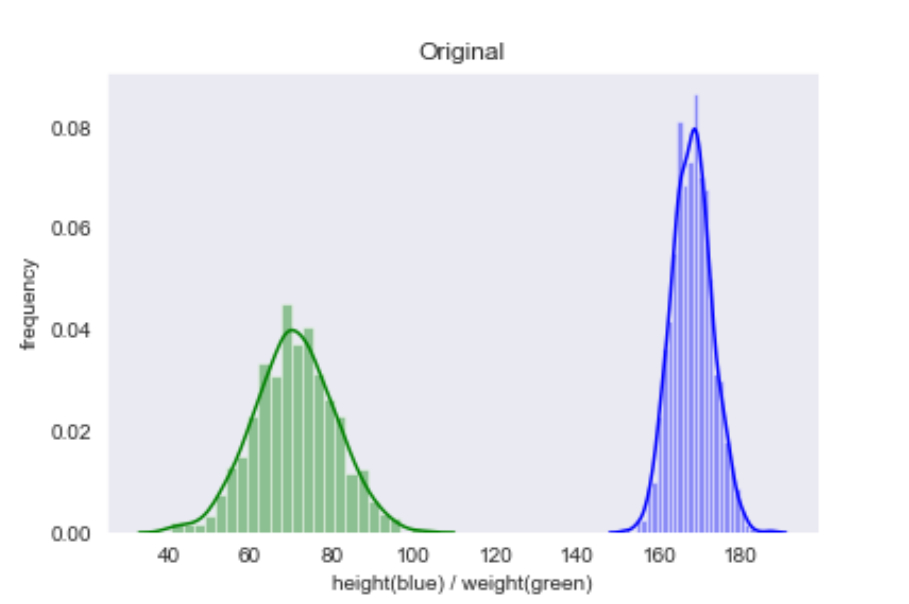

使用1.StandardScaler()即Z-score缩放，结果为：(注意下标和形状)

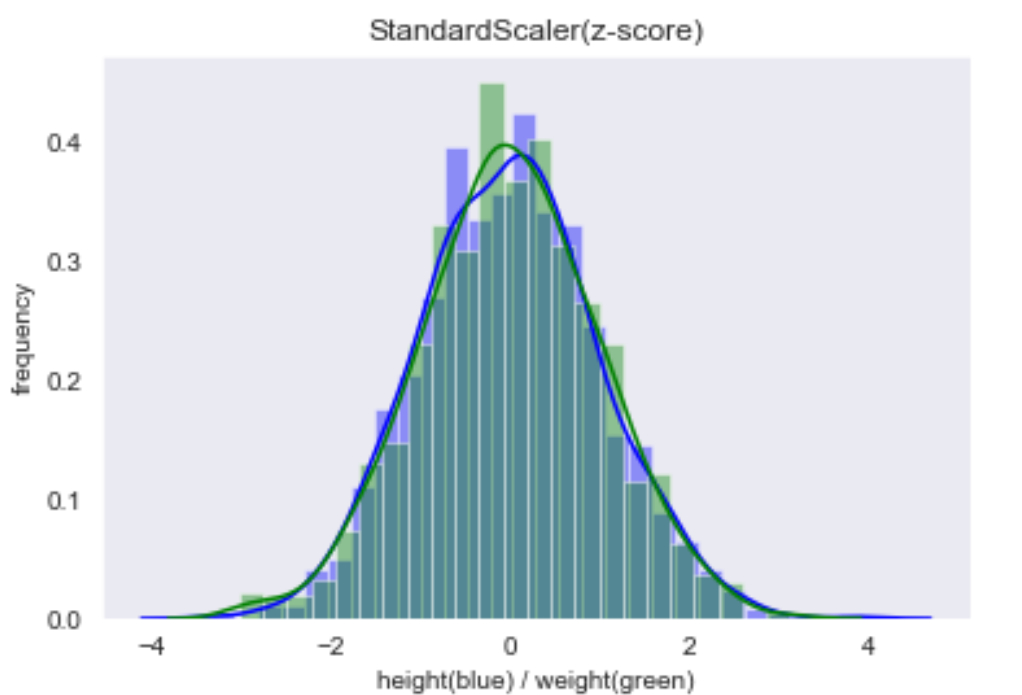

使用2.MinMaxScaler()即缩放到\[0,1\]缩放，结果为：(注意下标和形状)

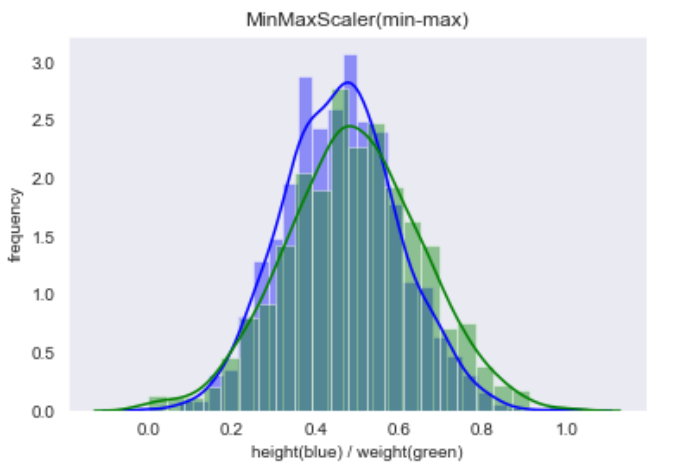

使用3.MaxAbsScaler()缩放到\[-1,1\]，结果为：(注意下标和形状)

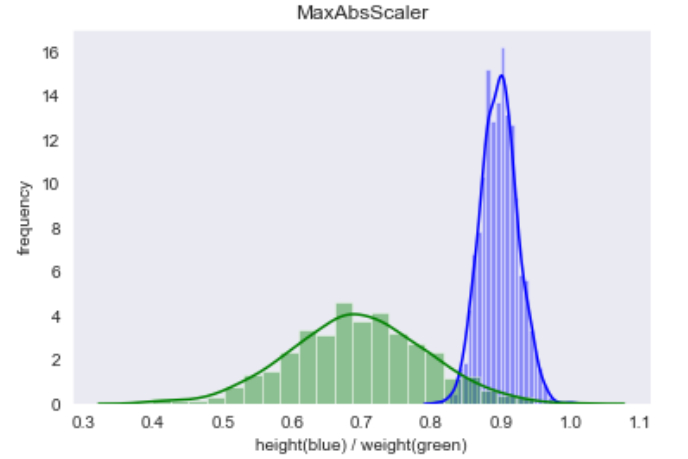 

使用4.Normalizer()缩放到\[0,1\]，结果为：

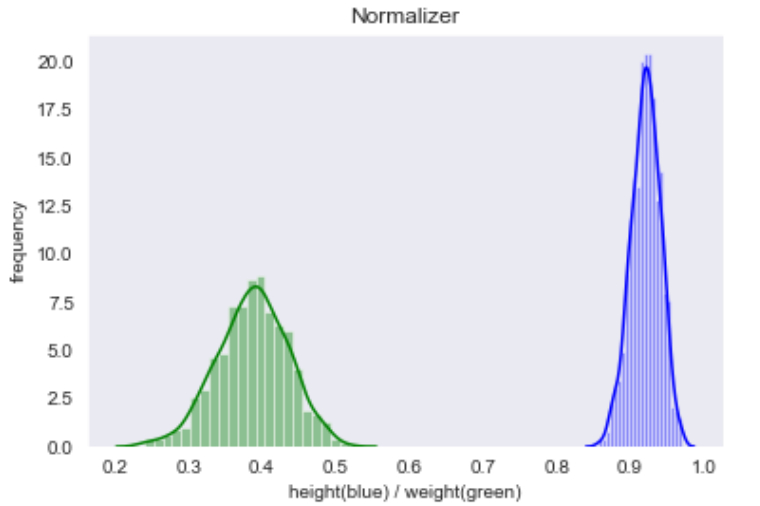

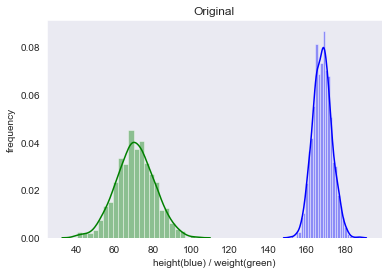

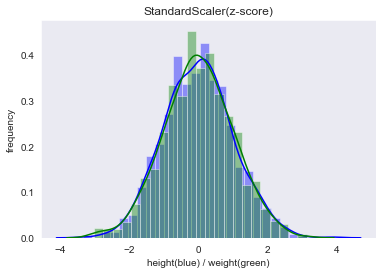

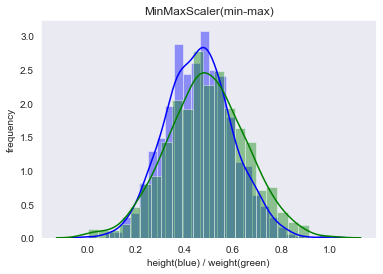

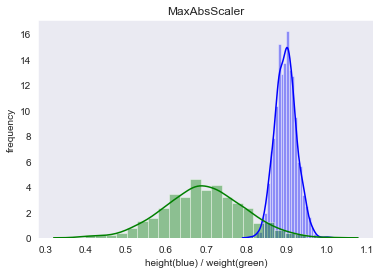

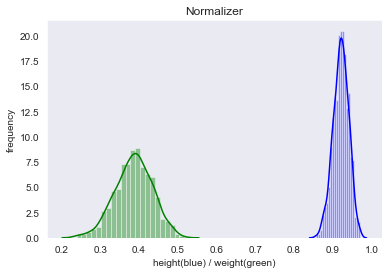

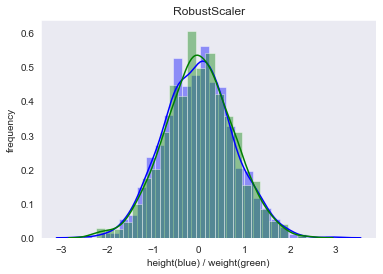

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from matplotlib import font_manager as fm


# 使用my_font存出一个加载的中文字体
my_font = fm.FontProperties(fname='C:\Windows\Fonts\msyh.ttc')



def plot(data, title):
    sns.set_style('dark')
    f, ax = plt.subplots()
    ax.set(ylabel='frequency')
    ax.set(xlabel='height(blue) / weight(green)')
    ax.set(title=title)
    sns.distplot(data[:, 0:1], color='blue')
    sns.distplot(data[:, 1:2], color='green')
    plt.savefig(title + '.png')
    plt.show()

np.random.seed(42)
height = np.random.normal(loc=168, scale=5, size=1000).reshape(-1, 1)
weight = np.random.normal(loc=70, scale=10, size=1000).reshape(-1, 1)

original_data = np.concatenate((height, weight), axis=1)
plot(original_data, 'Original')

standard_scaler_data = preprocessing.StandardScaler().fit_transform(original_data)
plot(standard_scaler_data, 'StandardScaler(z-score)')

min_max_scaler_data = preprocessing.MinMaxScaler().fit_transform(original_data)
plot(min_max_scaler_data, 'MinMaxScaler(min-max)')

max_abs_scaler_data = preprocessing.MaxAbsScaler().fit_transform(original_data)
plot(max_abs_scaler_data, 'MaxAbsScaler')

normalizer_data = preprocessing.Normalizer().fit_transform(original_data)
plot(normalizer_data, 'Normalizer')

robust_scaler_data = preprocessing.RobustScaler().fit_transform(original_data)
plot(robust_scaler_data, 'RobustScaler')

![](https://pic3.zhimg.com/80/v2-bacc3fa944fdd7be073552a19c5a2022_720w.jpg)

![](https://pic2.zhimg.com/80/ab7f0222010a5f36ac6a523db7a25109_720w.jpg)

cankao:

https://blog.csdn.net/weixin_36604953/article/details/102652160

https://www.zhihu.com/question/20467170/answer/839255695?utm_source=qq&utm_medium=social&utm_oi=41008184164352

https://zhuanlan.zhihu.com/p/93350539

mec 用PPO强化学习算法

谢邀！如果状态变化比较大，并且每一维度不在一个量级，输入神经网络的状态肯定是需要归化的，至于输出的行为范围取决于你的环境，如果行为空间是（-1,1）那直接最后一层用tanh进行约束，如果不在这个范围，也可以转换一下区间。另外如果你的行为区间比如是（0,100）不要让策略网络直接输出到行为空间的范围。先让策略网络输出在（-1,1）区间，然后再输入到环境中的时候在进行反归化到真实的范围。仅供参考，可以试试！

作者：未来的你
链接：https://www.zhihu.com/question/459063484/answer/1884528767
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。